### Import Libraries & Data

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [488]:
df = pd.read_csv('train.csv')
df.drop(columns = 'id', inplace = True)

# A. DATA CLEANING

#### Clean Response Variable

In [489]:
df['cancel'].value_counts()

 0    741064
 2    228777
 1     75282
-1      3452
Name: cancel, dtype: int64

In [490]:
df = df[df['cancel'] != -1]
df['cancel'].value_counts()

0    741064
2    228777
1     75282
Name: cancel, dtype: int64

#### Clean explanatory Variables

In [491]:
df.isnull().sum().sum()

14466

In [492]:
df.isnull().sum()

cancel                  0
year                    0
zip.code              944
house.color           939
ni.age               1001
len.at.res            960
credit                905
coverage.type         979
dwelling.type         990
premium               955
sales.channel        1020
ni.gender             957
ni.marital.status     992
n.adults              929
n.children            935
tenure                978
claim.ind             982
dtype: int64

*We will handle them as and when required.*

#### Primary Features

In [493]:
primary_x = ['claim.ind', 'sales.channel','dwelling.type','coverage.type','credit','tenure']
count = 0
for i in primary_x:
    count = count + df.loc[df[i].isnull(),'cancel'].value_counts()[2]
print(count)

1229


We lose out on 1229 cancellations if we drop null records from the primary columns. For now, we will proceed as it is and handle this later.

In [494]:
# Drop null records for a primary set of features
df.dropna(axis = 0, subset = primary_x, inplace = True)

# Impute missing premiums as median of premiums:
df['premium'] = df['premium'].fillna(df['premium'].mean())

# Change Data Type:
df['cancel'] = df['cancel'].astype('category')
df['claim.ind'] = df['claim.ind'].astype('int')
df['tenure'] = df['tenure'].astype('int')
df['sales.channel'] = df['sales.channel'].astype('category')
df['dwelling.type'] = df['dwelling.type'].astype('category')
df['coverage.type'] = df['coverage.type'].astype('category')
df['credit'] = df['credit'].astype('category')
df['year'] = df['year'].astype('category')

# Create corrected columns for plotting purposes:
df['claim'] = df['claim.ind'].apply(lambda x: 'Y' if x == 1 else 'N')

In [495]:
df.isnull().sum()

cancel                 0
year                   0
zip.code             940
house.color          931
ni.age               998
len.at.res           958
credit                 0
coverage.type          0
dwelling.type          0
premium                0
sales.channel          0
ni.gender            949
ni.marital.status    988
n.adults             927
n.children           931
tenure                 0
claim.ind              0
claim                  0
dtype: int64

#### Secondary Features

In [496]:
secondary_x = ['ni.gender','ni.marital.status','n.adults','n.children']
count = 0
for i in secondary_x:
    count = count + df.loc[df[i].isnull(),'cancel'].value_counts()[2]
print(count)

249


We lose out on 249 cancellations if we drop null records from the secondary columns. For now, we will proceed as it is and handle this later.

In [497]:
# Drop null records for a primary set of features
df.dropna(axis = 0, subset = secondary_x, inplace = True)

# Change Data Type:
df['ni.marital.status'] = df['ni.marital.status'].astype('int').astype('category')
df['n.adults'] = df['n.adults'].astype('int')
df['n.children'] = df['n.children'].astype('int')
df['ni.gender'] = df['ni.gender'].astype('category')

# Create corrected columns for plotting purposes:
df['married'] = df['ni.marital.status'].apply(lambda x: 'Y' if x == 1 else 'N')

In [498]:
df.isnull().sum()

cancel                 0
year                   0
zip.code             933
house.color          925
ni.age               994
len.at.res           955
credit                 0
coverage.type          0
dwelling.type          0
premium                0
sales.channel          0
ni.gender              0
ni.marital.status      0
n.adults               0
n.children             0
tenure                 0
claim.ind              0
claim                  0
married                0
dtype: int64

#### Tertiary Features

In [499]:
tertiary_x = ['zip.code','ni.age','len.at.res']
count = 0
for i in tertiary_x:
    count = count + df.loc[df[i].isnull(),'cancel'].value_counts()[2]
print(count)

202


We lose out on 202 cancellations if we drop null records from the tertiary columns. For now, we will proceed as it is and handle this later.

In [500]:
# Drop null records for a primary set of features
df.dropna(axis = 0, subset = tertiary_x, inplace = True)

# Change Data Type:
df['zip.code'] = df['zip.code'].astype('int').astype('str')

In [501]:
df.isnull().sum()

cancel                 0
year                   0
zip.code               0
house.color          924
ni.age                 0
len.at.res             0
credit                 0
coverage.type          0
dwelling.type          0
premium                0
sales.channel          0
ni.gender              0
ni.marital.status      0
n.adults               0
n.children             0
tenure                 0
claim.ind              0
claim                  0
married                0
dtype: int64

In [502]:
df.head()

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,claim,married
0,0,2013,98004,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0,2,0,15,0,N,N
1,0,2013,85017,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1,5,0,15,0,N,Y
2,0,2013,80021,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0,1,0,14,0,N,N
3,0,2013,85002,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0,5,0,22,1,Y,N
4,0,2013,50001,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1,2,4,4,0,N,Y


# B. HYPOTHESIS TESTING - Single Features v/s. Response

### Categorical Features: Proportion across Response Categories (0/1/2)

#### 1. Credit

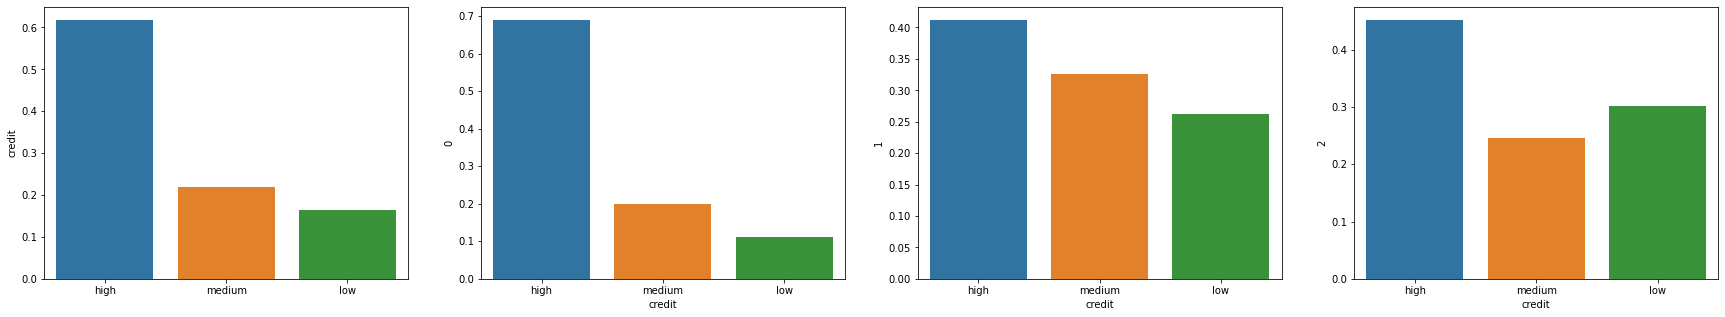

In [443]:
dt = pd.DataFrame(df['credit'].value_counts(normalize = True))
dt2 = pd.crosstab(df['credit'],df['cancel'], normalize = 'columns')
order = ['high','medium','low']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'credit', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, data = dt2, order = order, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, data = dt2, order = order, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, data = dt2, order = order,ax = ax[3])
plt.show()

There is clear effect of credit level on policy cancellations!!

In [444]:
dt2 = pd.crosstab(df['credit'],df['cancel'])
dt2

cancel,0,1,2
credit,,,
high,505229,30648,102186
low,81449,19533,68276
medium,145465,24206,55633


In [445]:
stats.chi2_contingency(observed = dt2)

(70453.05578905804,
 0.0,
 4,
 array([[452394.00460864,  45964.01634766, 139704.9790437 ],
        [120005.86843627,  12192.80459605,  37059.32696768],
        [159743.12695509,  16230.17905629,  49330.69398862]]))

#### 2. Claim

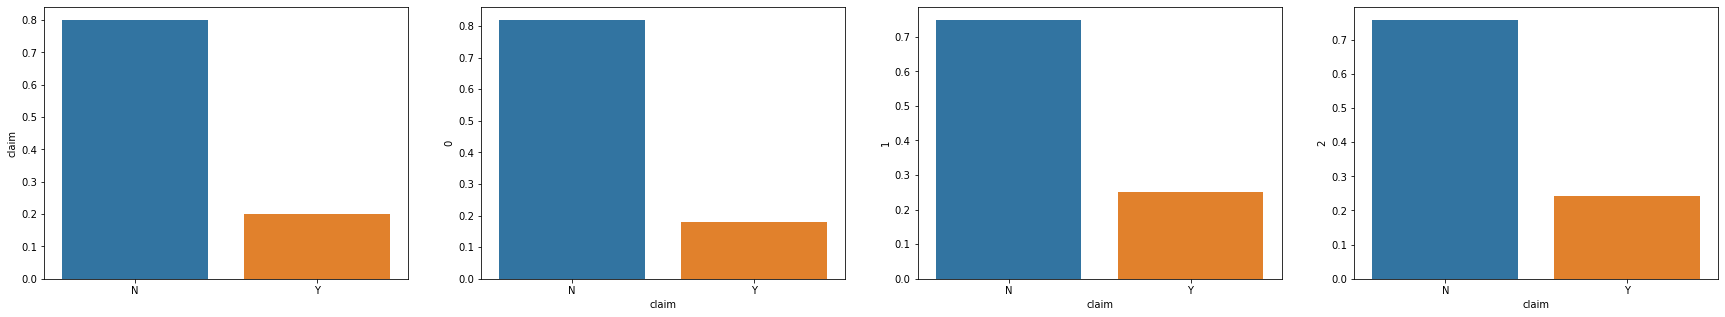

In [446]:
dt = pd.DataFrame(df['claim'].value_counts(normalize = True))
dt2 = pd.crosstab(df['claim'],df['cancel'], normalize = 'columns')
order = ['N', 'Y']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'claim', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

The proportion of claims is slightly less for retained policies. Still, Run Chi-Sq test of proportionality

In [447]:
dt2 = pd.crosstab(df['claim'],df['cancel'])
dt2

cancel,0,1,2
claim,,,
N,599479,55682,171298
Y,132664,18705,54797


In [448]:
stats.chi2_contingency(observed = dt2)

(5390.505038853105,
 0.0,
 2,
 array([[585968.93512843,  59535.46121099, 180954.60366057],
        [146174.06487157,  14851.53878901,  45140.39633943]]))

#### 3. Coverage Type

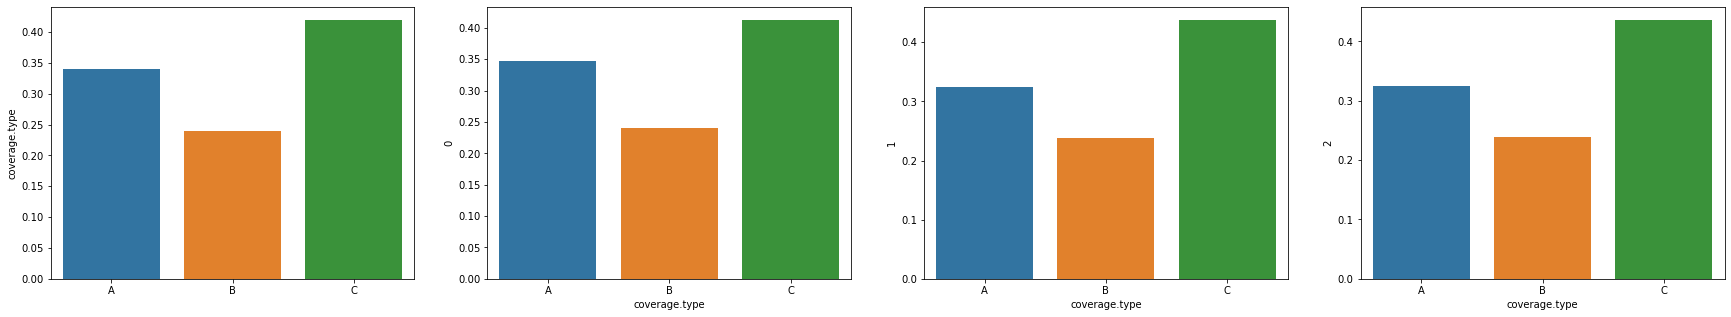

In [449]:
dt = pd.DataFrame(df['coverage.type'].value_counts(normalize = True))
dt2 = pd.crosstab(df['coverage.type'],df['cancel'], normalize = 'columns')
order = ['A', 'B', 'C']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'coverage.type', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

Doesn't look like Coverage type is very different between cancelled & retained.

Still, we may want to run Chi-Sq tests

In [450]:
dt2 = pd.crosstab(df['coverage.type'],df['cancel'])
dt2

cancel,0,1,2
coverage.type,,,
A,253846,24121,73584
B,176212,17699,53914
C,302085,32567,98597


In [451]:
stats.chi2_contingency(observed = dt2)

(586.6195816656519,
 1.2189364476557307e-125,
 4,
 array([[249253.70177267,  25324.60887253,  76972.6893548 ],
        [175710.7749425 ,  17852.519816  ,  54261.7052415 ],
        [307178.52328483,  31209.87131146,  94860.6054037 ]]))

#### 4. Sales Channel

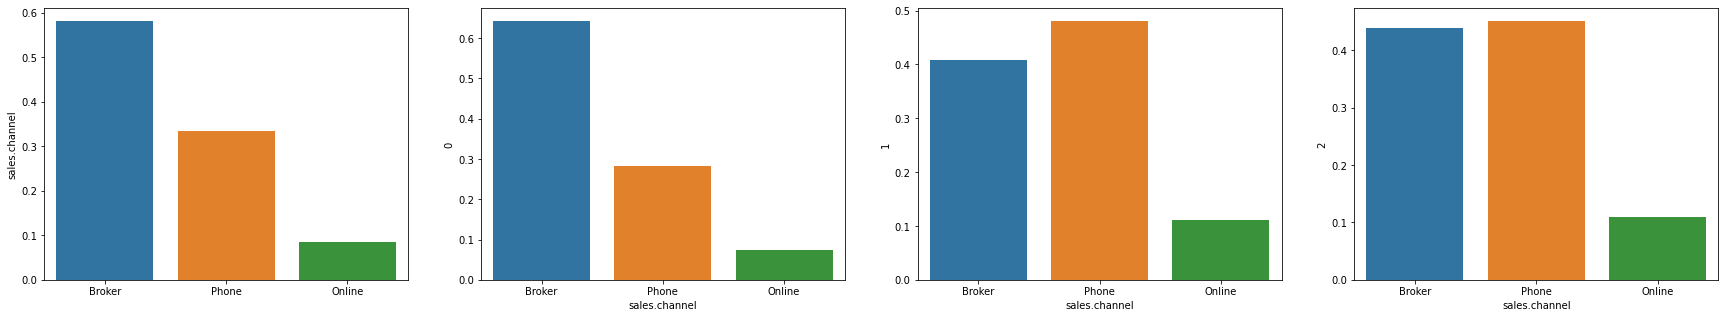

In [452]:
dt = pd.DataFrame(df['sales.channel'].value_counts(normalize = True))
dt2 = pd.crosstab(df['sales.channel'],df['cancel'], normalize = 'columns')
order = ['Broker', 'Phone', 'Online']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'sales.channel', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

OMG!! There is clear effect of Sales Channel on Policies getting cancelled or retained!

Still, run chi-sq test of independence if want.

In [453]:
dt2 = pd.crosstab(df['sales.channel'],df['cancel'])
dt2

cancel,0,1,2
sales.channel,,,
Broker,470609,30310,99297
Online,54759,8311,24724
Phone,206775,35766,102074


In [454]:
stats.chi2_contingency(observed = dt2)

(39571.951279043744,
 0.0,
 4,
 array([[425560.04637502,  43237.63960005, 131418.31402494],
        [ 62246.95561506,   6324.39876819,  19222.64561675],
        [244335.99800993,  24824.96163176,  75454.04035831]]))

#### 5. Dwelling Type

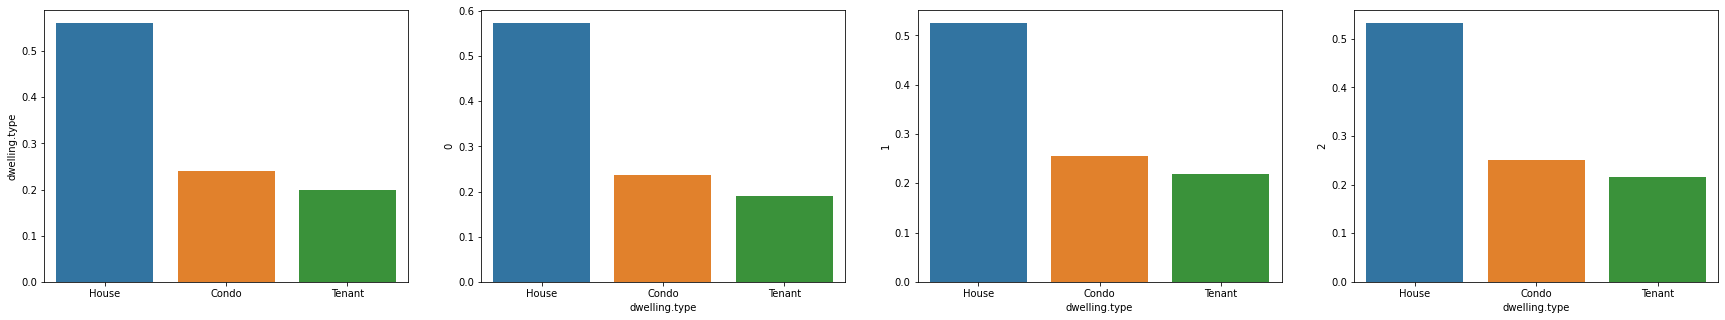

In [455]:
dt = pd.DataFrame(df['dwelling.type'].value_counts(normalize = True))
dt2 = pd.crosstab(df['dwelling.type'],df['cancel'], normalize = 'columns')
order = ['House', 'Condo', 'Tenant']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'dwelling.type', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

Slightly higher cases of policy cancellation for Condo & Tenant. Still, doesn't say much.

Best to run Chi-Sq tests.

In [456]:
dt2 = pd.crosstab(df['dwelling.type'],df['cancel'])
dt2

cancel,0,1,2
dwelling.type,,,
Condo,172679,18976,56824
House,420013,39069,120404
Tenant,139451,16342,48867


In [457]:
stats.chi2_contingency(observed = dt2)

(1708.3961477473645,
 0.0,
 4,
 array([[176174.46846338,  17899.63188282,  54404.89965379],
        [410862.23798378,  41744.31674809, 126879.44526813],
        [145106.29355284,  14743.05136908,  44810.65507808]]))

#### 6. Year

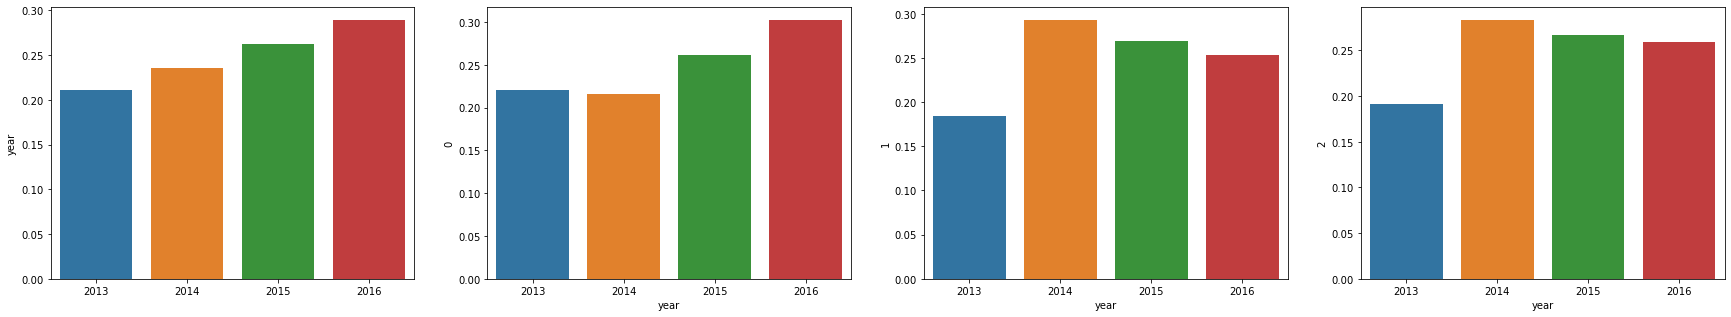

In [458]:
dt = pd.DataFrame(df['year'].value_counts(normalize = True))
dt2 = pd.crosstab(df['year'],df['cancel'], normalize = 'columns')
order = [2013, 2014, 2015, 2016]

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'year', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

In [459]:
dt2 = pd.crosstab(df['year'],df['cancel'])
dt2

cancel,0,1,2
year,,,
2013,161411,13737,43219
2014,158007,21794,64065
2015,191265,20020,60306
2016,221460,18836,58505


In [460]:
stats.chi2_contingency(observed = dt2)

(6940.842587946306,
 0.0,
 6,
 array([[154824.71418085,  15730.45977872,  47811.82604043],
        [172903.79841472,  17567.3261271 ,  53394.87545818],
        [192561.14224719,  19564.54639099,  59465.31136182],
        [211853.34515724,  21524.66770318,  65422.98713957]]))

#### 7. Gender

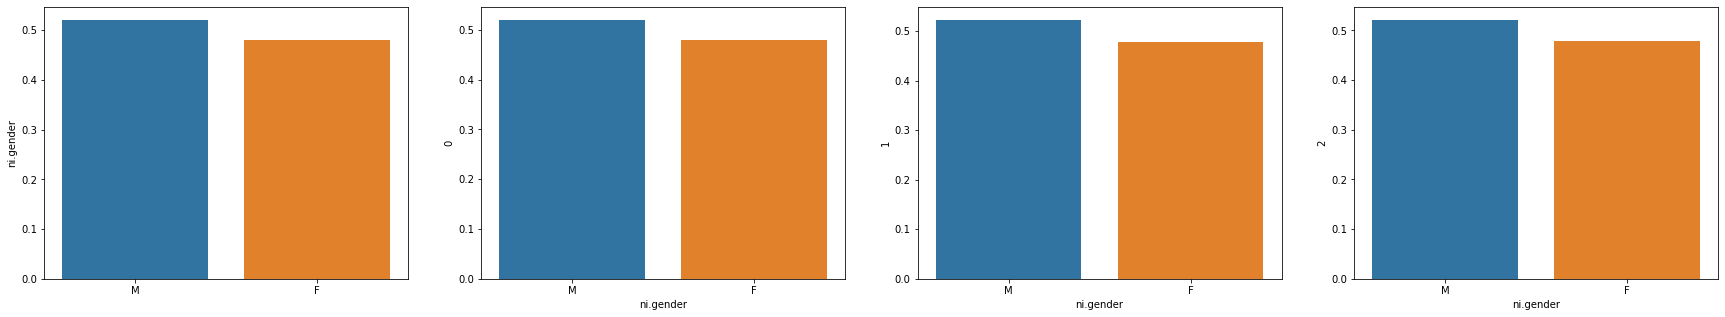

In [461]:
dt = pd.DataFrame(df['ni.gender'].value_counts(normalize = True))
dt2 = pd.crosstab(df['ni.gender'],df['cancel'], normalize = 'columns')
order = ['M','F']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'ni.gender', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

In [462]:
dt2 = pd.crosstab(df['ni.gender'],df['cancel'])
dt2

cancel,0,1,2
ni.gender,,,
F,351436,35510,108328
M,380707,38877,117767


In [463]:
stats.chi2_contingency(observed = dt2)

(2.178224730801374,
 0.3365150635902832,
 2,
 array([[351154.96156107,  35677.95379542, 108441.08464351],
        [380988.03843893,  38709.04620458, 117653.91535649]]))

#### 8. Marital Status

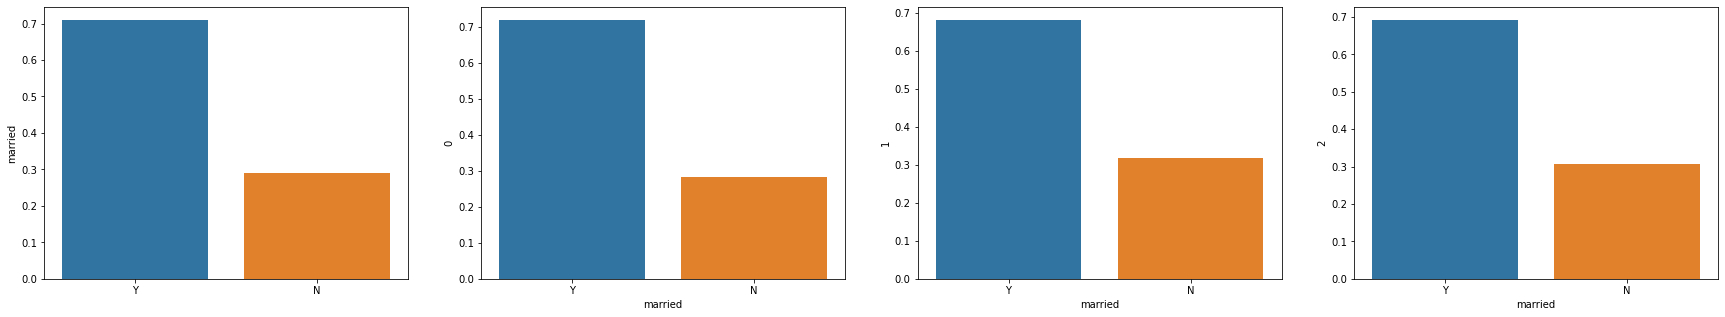

In [464]:
dt = pd.DataFrame(df['married'].value_counts(normalize = True))
dt2 = pd.crosstab(df['married'],df['cancel'], normalize = 'columns')
order = ['Y','N']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'married', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

In [465]:
dt2 = pd.crosstab(df['married'],df['cancel'])
dt2

cancel,0,1,2
married,,,
N,206197,23716,69623
Y,525946,50671,156472


In [466]:
stats.chi2_contingency(observed = dt2)

(902.0062726517632,
 1.3546483508074883e-196,
 2,
 array([[212374.46860961,  21577.61475076,  65583.91663963],
        [519768.53139039,  52809.38524924, 160511.08336037]]))

#### 9. House Color

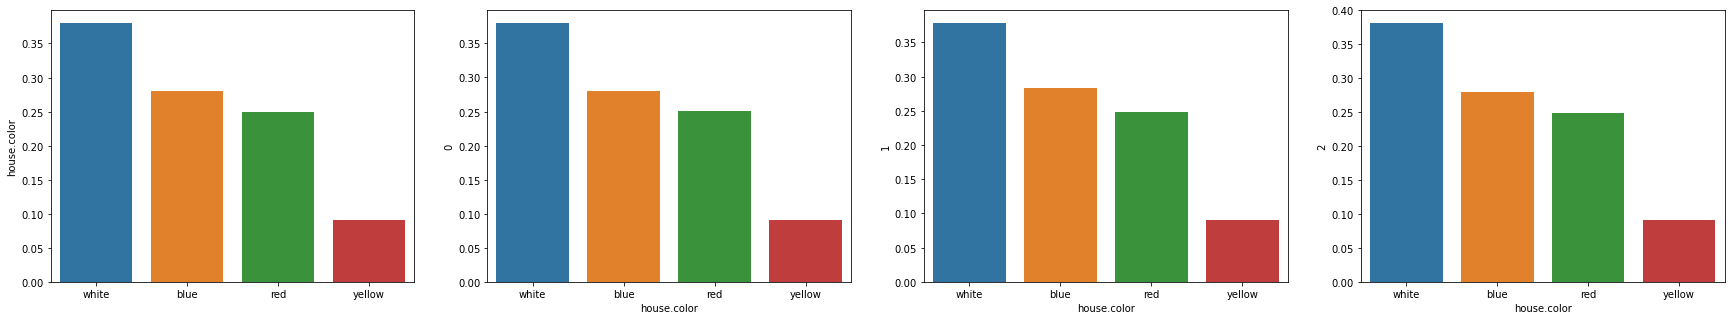

In [467]:
dt = pd.DataFrame(df['house.color'].value_counts(normalize = True))
dt2 = pd.crosstab(df['house.color'],df['cancel'], normalize = 'columns')
order = ['white','blue','red','yellow']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'house.color', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

In [468]:
dt2 = pd.crosstab(df['house.color'],df['cancel'])
dt2

cancel,0,1,2
house.color,,,
blue,204692,21061,63250
red,182888,18452,56122
white,277972,28115,86121
yellow,65936,6686,20406


In [469]:
stats.chi2_contingency(observed = dt2)

(6.831361344359652,
 0.33672489110206366,
 6,
 array([[204906.48595281,  20817.04771247,  63279.46633472],
        [182543.55036585,  18545.13184343,  56373.31779072],
        [278080.03045844,  28250.96157898,  85877.00796258],
        [ 65957.9332229 ,   6700.85886512,  20369.20791198]]))

### Numerical Features: Distribution across Response Categories (0/1/2)

#### 1. Premium

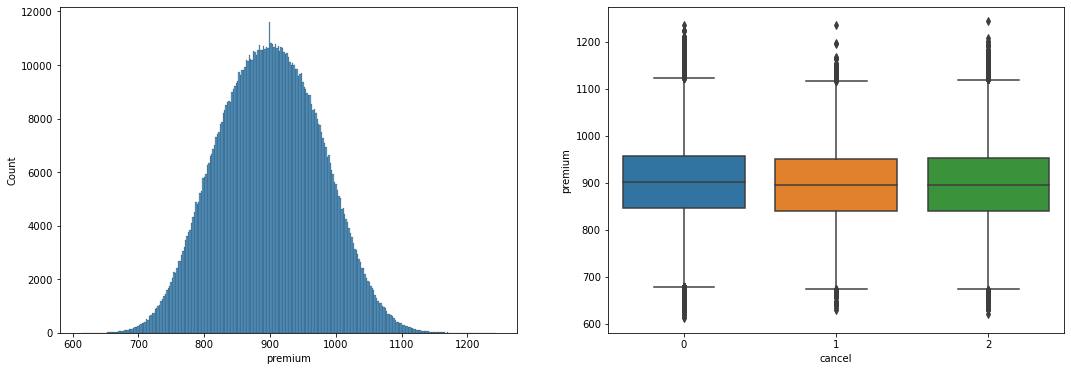

In [503]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.histplot(x = 'premium', data = df, ax = ax[0])
sns.boxplot(x = 'cancel', y = 'premium', data = df, ax = ax[1])
plt.show()

Doesn't appear any difference in premium means across cancellation indicator. Doesn't look like an important variable. Still, let's perform ANOVA.

In [507]:
df.loc[df['cancel'] == 0, 'premium'].describe()

count    732143.000000
mean        901.321740
std          77.599125
min         612.389520
25%         845.546873
50%         901.096388
75%         956.787501
max        1235.480942
Name: premium, dtype: float64

In [509]:
df.loc[df['cancel'] == 1, 'premium'].describe()

count    74387.000000
mean       895.839303
std         77.655328
min        630.284316
25%        839.824734
50%        895.282751
75%        950.694956
max       1235.313642
Name: premium, dtype: float64

In [508]:
df.loc[df['cancel'] == 2, 'premium'].describe()

count    226095.000000
mean        896.599919
std          77.742385
min         620.151537
25%         840.369957
50%         896.345124
75%         952.123593
max        1243.310538
Name: premium, dtype: float64

In [521]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('premium ~ cancel', data = df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
cancel,2.0,5.168743e+06,2.584372e+06,428.79008,7.179906e-187
Residual,1032622.0,6.223742e+09,6.027125e+03,NaN,NaN


In [525]:
stats.ttest_ind(a = df.loc[df['cancel'] == 1, 'premium'],
                b = df.loc[df['cancel'] == 2, 'premium'],
                equal_var = True,
                alternative = "two-sided")

Ttest_indResult(statistic=-2.315328065376448, pvalue=0.020595655019525295)

#### 2. Tenure

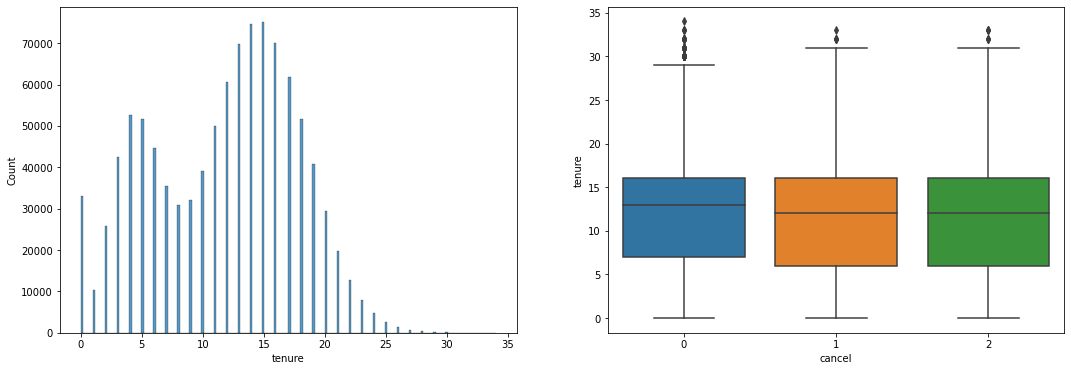

In [472]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.histplot(x = 'tenure', data = df, ax = ax[0])
sns.boxplot(x = 'cancel', y = 'tenure', data = df, ax = ax[1])
plt.show()

Tenure is Bimodal.....need to look into this. Mean Tenure of retained customers appears slightly higher than others. Will need to perform ANOVA.

In [526]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('tenure ~ cancel', data = df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
cancel,2.0,3.719910e+04,18599.548630,528.91913,2.575836e-230
Residual,1032622.0,3.631236e+07,35.165203,NaN,NaN


#### 3. Length at residence (how long policyholder lived at property)

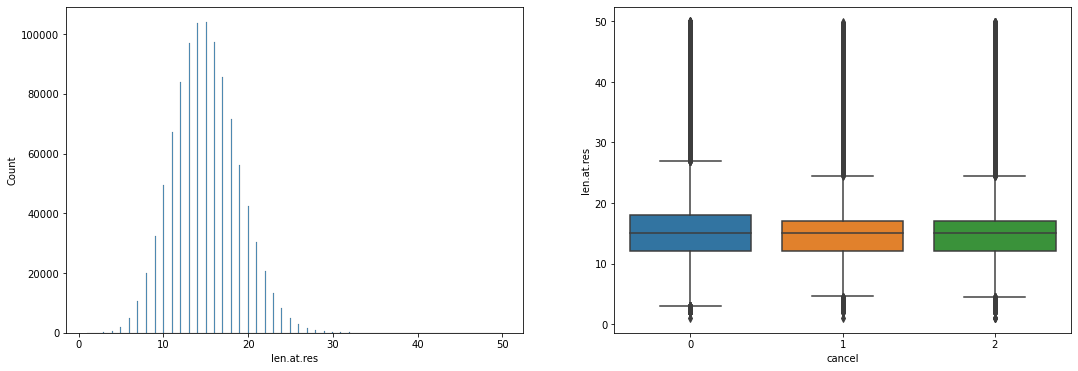

In [528]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.histplot(x = 'len.at.res', data = df, ax = ax[0])
sns.boxplot(x = 'cancel', y = 'len.at.res', data = df, ax = ax[1])
plt.show()

#### 4. Age

In [483]:
df.loc[df['ni.age'] >= 100,'cancel'].value_counts()

0    851
2     30
1     19
Name: cancel, dtype: int64

In [485]:
df2 = df[df['ni.age'] < 100]

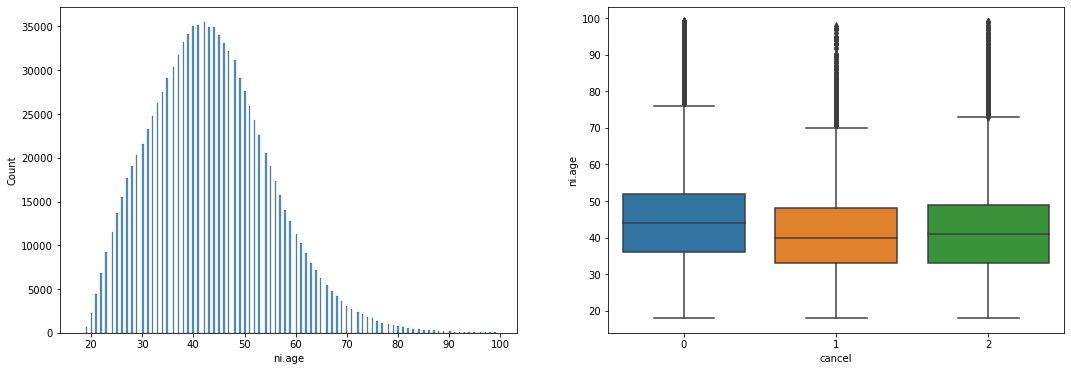

In [486]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.histplot(x = 'ni.age', data = df2, ax = ax[0])
sns.boxplot(x = 'cancel', y = 'ni.age', data = df2, ax = ax[1])
plt.show()

### Geographical Feature: Zip Code to Zone

In [541]:
df['zone'] = df['zip.code'].astype(str).str[0:2]
df['zone'].value_counts()

50    278069
85    238173
80    196044
15    155085
98    113938
20     51316
Name: zone, dtype: int64

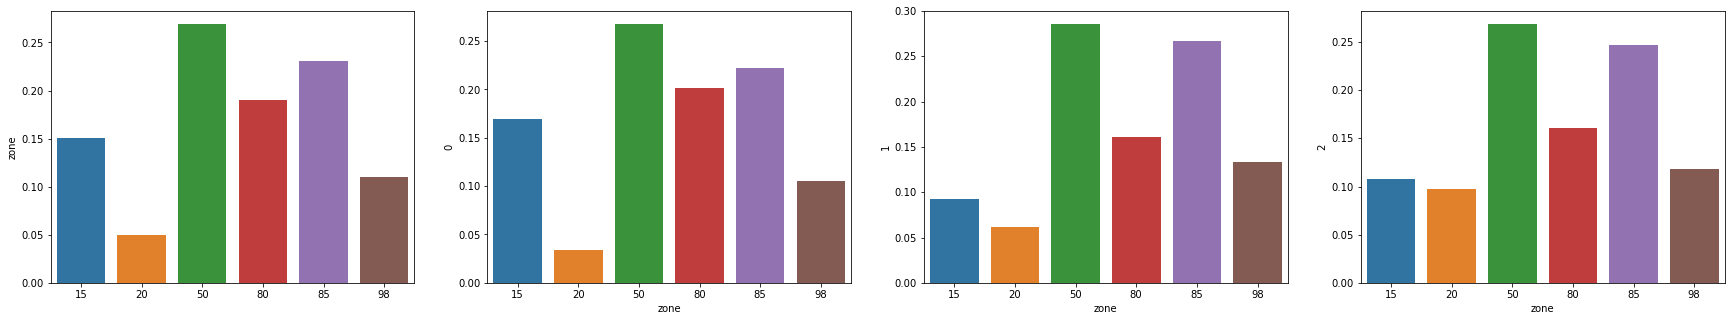

In [542]:
dt = pd.DataFrame(df['zone'].value_counts(normalize = True))
dt2 = pd.crosstab(df['zone'],df['cancel'], normalize = 'columns')
order = ['15', '20', '50', '80', '85', '98']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30,5))
sns.barplot(x = dt.index, y = 'zone', order = order, data = dt, ax = ax[0])
sns.barplot(x = dt2.index, y = 0, order = order, data = dt2, ax = ax[1])
sns.barplot(x = dt2.index, y = 1, order = order, data = dt2, ax = ax[2])
sns.barplot(x = dt2.index, y = 2, order = order, data = dt2, ax = ax[3])
plt.show()

### Deriving clusters of Customers using Features: Gender/married/children

In [543]:
df.head()

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,claim,married,zone
0,0,2013,98004,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0,2,0,15,0,N,N,98
1,0,2013,85017,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1,5,0,15,0,N,Y,85
2,0,2013,80021,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0,1,0,14,0,N,N,80
3,0,2013,85002,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0,5,0,22,1,Y,N,85
4,0,2013,50001,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1,2,4,4,0,N,Y,50


In [549]:
df['kids'] = df['n.children'].apply(lambda x: 0 if x == 0 else ('Less than 3' if x <= 3 else 'More than 3'))

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,...,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind,claim,married,zone,kids
0,0,2013,98004,blue,37.0,18.000000,high,C,Tenant,950.507336,...,F,0,2,0,15,0,N,N,98,0
1,0,2013,85017,white,40.0,17.000000,medium,A,Condo,909.346046,...,F,1,5,0,15,0,N,Y,85,0
2,0,2013,80021,white,45.0,14.000000,high,A,House,897.084502,...,M,0,1,0,14,0,N,N,80,0
3,0,2013,85002,red,45.0,24.366136,high,A,House,979.039007,...,M,0,5,0,22,1,Y,N,85,0
4,0,2013,50001,yellow,36.0,16.000000,high,C,House,932.379027,...,M,1,2,4,4,0,N,Y,50,More than 3
